Genetic Algorithm for OneMax
https://machinelearningmastery.com/simple-genetic-algorithm-from-scratch-in-python/

The first step is to create a population of random bitstrings. We could use boolean values True and False, string values ‘0’ and ‘1’, or integer values 0 and 1. 

In [160]:
import numpy as np
from numpy.random import randint
from numpy.random import rand
import matplotlib.pyplot as plt
%matplotlib inline

Define an objective / fitness function to be minimised.

The problem is called OneMax and evaluates a binary string based on the number of 1s in the string. For example, a bitstring with a length of 20 bits will have a score of 20 for a string of all 1s.

The onemax() function below implements this and takes a bitstring of integer values as input and returns the negative sum of the values.

In [161]:
def onemax(x):
    """objective function"""
    return -sum(x)

In [162]:

def selection(pop, scores, k=3):
    """
    tournament selection
    """
    
    sample_idx = randint(0, len(pop), k)       # select k random indexes for individuals to sample
    
    sample = [scores[i] for i in sample_idx]   # score of each individual
    
    best_idx = np.argmin(sample)               # ID of best score (tournament)
    
    return pop[best_idx]                       # return best individual 
    
    

In [163]:
# tournament selection
def selection(pop, scores, k=3):
    
    selection_ix = randint(len(pop))          # first random selection
    
    for ix in randint(0, len(pop), k-1):
        
        if scores[ix] < scores[selection_ix]: # check if better (e.g. perform a tournament)
            
            selection_ix = ix
            
    return pop[selection_ix]

In [164]:
def crossover(p1, p2, r_cross):
    """
    crossover two parents to create two children
    """
    c1, c2 = p1.copy(), p2.copy()    # children are copies of parents by default
    
    if rand() < r_cross:             # check if randomly selected value below threshold r_cross
        
        pt = randint(1, len(p1)-2)   # select crossover point that is not on either end of the string
        
        c1 = p1[:pt] + p2[pt:]       # perform crossover
        c2 = p2[:pt] + p1[pt:]
        
    return [c1, c2]

In [165]:

def mutation(bitstring, r_mut):
    """
    mutation operator
    """
    
    for i in range(len(bitstring)):
        
        if rand() < r_mut:                     # check for a mutation
            
            bitstring[i] = 1 - bitstring[i]    # flip the bit

In [166]:
# genetic algorithm
def genetic_algorithm(objective, n_bits, n_iter, n_pop, r_cross, r_mut):
    
    # initial population of random bitstring individuals
    pop = [randint(0, 2, n_bits).tolist() for _ in range(n_pop)]
    
    print(np.matrix(pop))
    
    log_best = []# store highest score each generation to plot progression    
    
    # cycle through each generation
    for gen in range(n_iter):
        
        # evaluate all candidates in the population
        scores = [objective(c) for c in pop]
        
        best = min(scores)
        
        best_ID = np.argmin(scores)
        
        log_best.append(best)
        
        #print(f"Gen {gen}, highest score = {best}, chromosome = {pop[best_ID]}")
        
        # select parents
        # run tournament selection n_pop times to get n_pop winners 
        # (population size does not change) 
        selected = [selection(pop, scores) for _ in range(n_pop)] 
        
        # create the next generation
        children = []
        
        for i in range(0, n_pop, 2):             # select parents in pairs
            p1, p2 = selected[i], selected[i+1]
            
            for c in crossover(p1, p2, r_cross): # crossover each pair to give two children
                
                mutation(c, r_mut)               # mutate each child
                
                children.append(c)               # store for next generation
                
        
        # replace population
        pop = children
        
    return best, log_best
        
        
        

In [167]:

n_iter = 100     # define the total iterations

n_bits = 20      # bits

n_pop = 100      # define the population size (n individuals)

r_cross = 0.9    # crossover rate

r_mut = 1.0 / float(n_bits) # mutation rate

best, log_best = genetic_algorithm(onemax, n_bits, n_iter, n_pop, r_cross, r_mut)

[[1 0 0 ... 1 1 0]
 [1 0 1 ... 1 0 1]
 [1 1 1 ... 0 0 1]
 ...
 [1 1 1 ... 0 1 0]
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 1 1 0]]


7


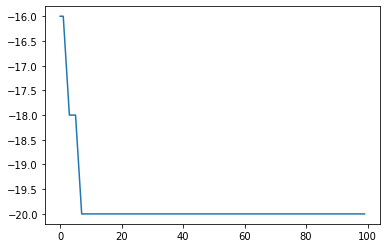

In [168]:
print(np.argmin(log_best))
      
plt.plot(log_best)

Gen 0, highest score = -15, chromosome = [0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Gen 1, highest score = -16, chromosome = [0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1]
Gen 2, highest score = -17, chromosome = [1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1]
Gen 3, highest score = -19, chromosome = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1]
Gen 7, highest score = -20, chromosome = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


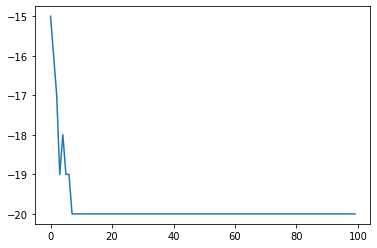

In [181]:
# genetic algorithm search of the one max optimization problem
from numpy.random import randint
from numpy.random import rand


n_iter = 100  # total iterations

n_bits = 20   # bits in individual chromosone 

n_pop = 100   # population size (number of individuals)

r_cross = 0.9 # crossover rate

r_mut = 1.0 / float(n_bits) # mutation rate


# objective function
def onemax(x):
    return -sum(x)


def selection(pop, scores, k=3):
    """
    tournament selection
    
    """
    sample_idxs = randint(0, len(pop), k)       # select k random indexes for individuals to sample
    
    sample = [scores[i] for i in sample_idxs]   # score of each individual
    
    best_sample_idx = np.argmin(sample)         # ID of best score in sample (tournament)
    
    best_pop_idx = sample_idxs[best_sample_idx] # population ID of best score in sample
    
    return pop[best_pop_idx]                    # return best individual in tournament


def crossover(p1, p2, r_cross):
    """
    crossover two parents to create two children
    """
    c1, c2 = p1.copy(), p2.copy()    # children are copies of parents by default
    
    if rand() < r_cross:             # decide whether to cross
        
        pt = randint(1, len(p1)-2)   # select crossover point that is not on either end of the string
        
        c1 = p1[:pt] + p2[pt:]       # perform crossover
        c2 = p2[:pt] + p1[pt:]
        
    return [c1, c2]


            
def mutation(bitstring, r_mut):
    """
    mutation operator
    """
    for i in range(len(bitstring)):
        
        if rand() < r_mut:                     # decide whether to mutate
            
            bitstring[i] = 1 - bitstring[i]    # flip the bit



# genetic algorithm
def genetic_algorithm(objective, n_bits, n_iter, n_pop, r_cross, r_mut):
    
    # initial population of random bitstring individuals
    pop = [randint(0, 2, n_bits).tolist() for _ in range(n_pop)]
    
    #print(np.matrix(pop))
    
    best_log = []                                                 # track best solution each round
    
    best_gen, best_score, best_sol = 0, objective(pop[0]), pop[0] # track best overall solution
    
    
    for gen in range(n_iter):                    # cycle through each generation
          
        scores = [objective(c) for c in pop]     # evaluate all candidates in the population
        
        best = min(scores)
        
        best_ID = np.argmin(scores)
        
        best_log.append(best)
        
        
        if best < best_score:
            best_gen = gen
            best_score = best
            best_sol = pop[best_ID]          
            print(f"Gen {gen}, highest score = {best}, chromosome = {pop[best_ID]}")
        
        # select parents:
        # run tournament selection n_pop times to get n_pop winners (population size does not change)
        selected = [selection(pop, scores) for _ in range(n_pop)] 
        
        # create the next generation
        children = []
        
        for i in range(0, n_pop, 2):             # select parents in pairs
            p1, p2 = selected[i], selected[i+1]
            
            for c in crossover(p1, p2, r_cross): # crossover each pair to give two children
                
                mutation(c, r_mut)               # mutate each child
                
                children.append(c)               # store for next generation
                
        
        # replace population
        pop = children
        
    return best, best_log, best_gen, best_score, best_sol



# perform the genetic algorithm search
best, best_log, best_gen, best_score, best_sol = genetic_algorithm(onemax, n_bits, n_iter, n_pop, r_cross, r_mut)

# print(best, best_gen, best_score, best_sol)

plt.plot(best_log)